In [1]:
%matplotlib inline
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.finance as mf
from matplotlib.dates import date2num

/Users/sakamotomasakiyo/virtualenv-sandbox/bitflyer/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [19]:
client = pymongo.MongoClient('localhost', 27017)
db = client.bitflyer
co = db.lightning_executions_BTC_JPY_OHLC_86400

In [25]:
date=[]
quote = []
for data in co.find().sort('id',1):
    t = data['open_date']
    date.append(t)
    quote.append((date2num(t), data['open_price'], data['close_price'], data['high_price'], data['low_price']))

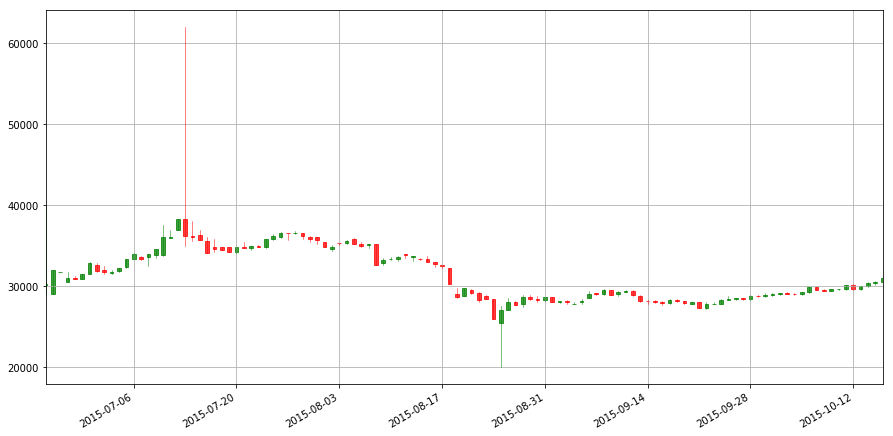

In [26]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.grid()
ax.set_xlim(date[0], date[-1])
mf.candlestick_ochl(ax, quote, width=0.5, colorup='g', colordown='r', alpha=0.75)
fig.autofmt_xdate()
plt.show()